<a href="https://colab.research.google.com/github/xbop/Data-Projects/blob/main/LA_Oil_Rigs_Geospatial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

LA_GEOHUB_LINK = "https://docs.google.com/spreadsheets/d/19Odg9D9IVn2OXurdvpzSeS4xwC_dJ6mGZOmH7YtEe1Y/export?format=csv&gid=539598220"
geohub_df = pd.read_csv(LA_GEOHUB_LINK)

# **Graph 1: LA County Areas with Most Oil Rigs (Bar Plot)**

In [ ]:
geohub_df.groupby("FieldName").describe()

X                              \
                                count          mean           std   
FieldName                                                           
Aliso Canyon                    245.0 -1.319780e+07  1.405272e+03   
Alondra (ABD)                     8.0 -1.317287e+07  4.708964e+02   
Any Field                      1444.0 -1.243239e+07  3.031905e+06   
Bandini                          69.0 -1.296354e+07  1.583578e+06   
Beverly Hills                   251.0 -1.307439e+07  1.174099e+06   
...                               ...           ...           ...   
Walnut                           23.0 -1.312726e+07  4.701422e+02   
Wayside Canyon                   38.0 -1.320057e+07  4.900872e+02   
Whittier                        741.0 -1.280010e+07  2.077854e+06   
Whittier Heights, North (ABD)    15.0 -1.313549e+07  2.437698e+02   
Wilmington                     2867.0 -1.309303e+07  9.497043e+05   

                                                                        \
                                       min           25%           50%   
FieldName                                                                
Aliso Canyon                  -13207084.16 -1.319868e+07 -1.319773e+07   
Alondra (ABD)                 -13173477.36 -1.317316e+07 -1.317308e+07   
Any Field                     -13237368.03 -1.319233e+07 -1.317031e+07   
Bandini                       -13155819.23 -1.315445e+07 -1.315409e+07   
Beverly Hills                 -13183278.52 -1.318151e+07 -1.317916e+07   
...                                    ...           ...           ...   
Walnut                        -13128204.78 -1.312756e+07 -1.312707e+07   
Wayside Canyon                -13201691.51 -1.320082e+07 -1.320048e+07   
Whittier                      -13142626.15 -1.313742e+07 -1.313653e+07   
Whittier Heights, North (ABD) -13136021.59 -1.313558e+07 -1.313548e+07   
Wilmington                    -13166986.49 -1.316373e+07 -1.316212e+07   

                                                                Y  \
                                        75%           max   count   
FieldName                                                           
Aliso Canyon                  -1.319679e+07 -1.319479e+07   245.0   
Alondra (ABD)                 -1.317242e+07 -1.317221e+07     8.0   
Any Field                     -1.314568e+07  2.267758e+00  1444.0   
Bandini                       -1.315392e+07  2.267758e+00    69.0   
Beverly Hills                 -1.317612e+07  2.267758e+00   251.0   
...                                     ...           ...     ...   
Walnut                        -1.312706e+07 -1.312663e+07    23.0   
Wayside Canyon                -1.320018e+07 -1.319990e+07    38.0   
Whittier                      -1.313577e+07  2.267758e+00   741.0   
Whittier Heights, North (ABD) -1.313540e+07 -1.313492e+07    15.0   
Wilmington                    -1.316065e+07  2.267758e+00  2867.0   

                                             ... WellDepthA     RedrillFoo  \
                                       mean  ...        75% max      count   
FieldName                                    ...                             
Aliso Canyon                   4.071047e+06  ...        NaN NaN      245.0   
Alondra (ABD)                  4.014156e+06  ...        NaN NaN        8.0   
Any Field                      3.821166e+06  ...        NaN NaN     1444.0   
Bandini                        3.970822e+06  ...        NaN NaN       69.0   
Beverly Hills                  4.004259e+06  ...        NaN NaN      251.0   
...                                     ...  ...        ...  ..        ...   
Walnut                         4.031356e+06  ...        NaN NaN       23.0   
Wayside Canyon                 4.092024e+06  ...        NaN NaN       38.0   
Whittier                       3.922629e+06  ...        NaN NaN      741.0   
Whittier Heights, North (ABD)  4.030205e+06  ...        NaN NaN       15.0   
Wilmington                     3.977521e+06  ...   

In [ ]:
sns.set_palette("colorblind")

top_five = geohub_df.groupby("FieldName").size().sort_values(ascending=False)
top_five = top_five[top_five.index != "Any Field"].reset_index(name="Count").head(5)
top_five.columns = ["FieldName", "Count"]
top_five = top_five.sort_values(by = 'FieldName')

/tmp/ipython-input-2809224429.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


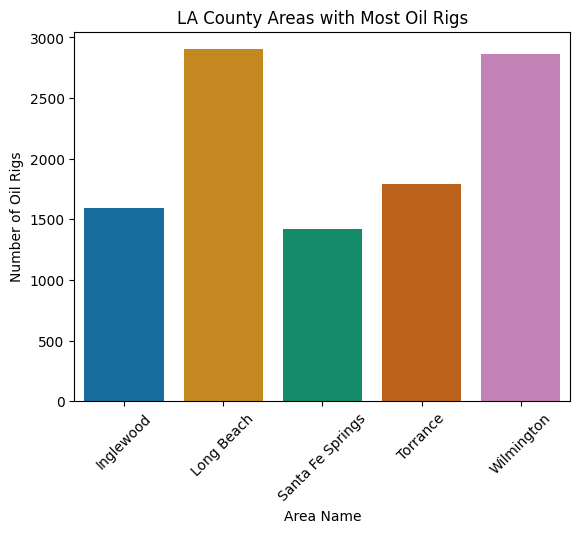

In [ ]:
ax = sns.barplot(x=top_five["FieldName"], y=top_five["Count"], hue=top_five["FieldName"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax.set_xlabel("Area Name")
ax.set_ylabel("Number of Oil Rigs")
ax.set_title("LA County Areas with Most Oil Rigs")
plt.savefig("Bar Plot: LA County Areas With Most Oil Rigs.jpg")

# **Graph 2: Pollution Burden Score and LA County Areas With Highest Oil Wells (KDE Graph)**

In [ ]:
Cal_Enviro_Link = "https://docs.google.com/spreadsheets/d/1Yi_oa0kLNgEp0PqbCZ7228BRmiT2IyC4/export?format=xlsx"
calenviro_df = pd.read_excel(Cal_Enviro_Link, dtype={"ZIP": str})
print(list(calenviro_df.columns))

['Census Tract', 'Total Population', 'California County', 'ZIP', 'Approximate Location', 'Longitude', 'Latitude', 'CES 4.0 Score', 'CES 4.0 Percentile', 'CES 4.0 Percentile Range', 'Ozone', 'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl', 'Drinking Water', 'Drinking Water Pctl', 'Lead', 'Lead Pctl', 'Pesticides', 'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic', 'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl', 'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste', 'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl', 'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden', 'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma', 'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl', 'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education', 'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl', 'Poverty', 'Poverty Pctl', 'Unemployment', 'Unemployment Pctl', 'Housing Burden', 'Housing Burde

In [ ]:
# okay this one is a bit complicated because the zipcodes are kinda
#arbitrarily assigned to the cities
# want to go back and make it a bit better

In [ ]:
# note to group (not to include in the write up):
# i am signficantly changing this from the original since in the assignment, it looks like
# that five zipcodes were select the top five cities (however, each of these cities)
# have multiple zipcodes...therefore, i found which zipcodes were in each city
# then added a column to designate which city they were in

In [ ]:
long_beach_df = calenviro_df[calenviro_df['Approximate Location'] == 'Long Beach']

In [ ]:
torrance_df = calenviro_df[calenviro_df['Approximate Location'] == 'Torrance']

In [ ]:
inglewood_df = calenviro_df[calenviro_df['Approximate Location'] == 'Inglewood']

In [ ]:
santa_fe_springs_df = calenviro_df[calenviro_df['Approximate Location'] == 'Santa Fe Springs']

In [ ]:
wilmington_df = calenviro_df[calenviro_df['ZIP'] == '90744']
#this will find the Wilmington ones!

In [ ]:
wilmington_df['Approximate Location'] = wilmington_df['Approximate Location'].replace('Los Angeles','Wilmington')
# renaming this to show that these are wilmington tracts

/tmp/ipython-input-104197354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wilmington_df['Approximate Location'] = wilmington_df['Approximate Location'].replace('Los Angeles','Wilmington')


In [ ]:
highest_oil_cities_df = pd.concat([inglewood_df,long_beach_df, santa_fe_springs_df, torrance_df,wilmington_df])

In [ ]:
highest_oil_cities_df['LA County Areas'] = highest_oil_cities_df['Approximate Location']

In [ ]:
highest_oil_cities_df.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,LA County Areas
172,6037601401,5949,Los Angeles,90301,Inglewood,-118.370061,33.959058,64.972317,97.831568,95-100% (highest scores),...,50.6,82.537688,7.3,69.976575,26.7,84.157161,79.335765,8.229697,91.906203,Inglewood
383,6037600502,2097,Los Angeles,90303,Inglewood,-118.330728,33.928051,59.137749,95.171457,95-100% (highest scores),...,27.7,50.012563,2.0,6.298803,20.9,66.514575,70.077733,7.269339,80.244579,Inglewood
468,6037601302,7333,Los Angeles,90302,Inglewood,-118.364443,33.969298,57.367570,94.099849,90-95%,...,43.4,73.894472,12.9,94.091619,28.0,86.793409,75.644954,7.846840,87.506304,Inglewood
645,6037601402,4793,Los Angeles,90301,Inglewood,-118.365733,33.950944,54.278330,91.868381,90-95%,...,36.3,63.643216,7.7,73.412285,16.9,48.517110,67.281756,6.979305,76.336359,Inglewood
698,6037602004,3709,Los Angeles,90303,Inglewood,-118.330645,33.934328,53.352647,91.200202,90-95%,...,39.4,68.266332,7.9,74.739719,28.2,87.249683,86.325920,8.954804,97.453354,Inglewood


Text(0.5, 1.0, 'Pollution Burden Score of Top Five LA County Areas with Most Oil Rigs')

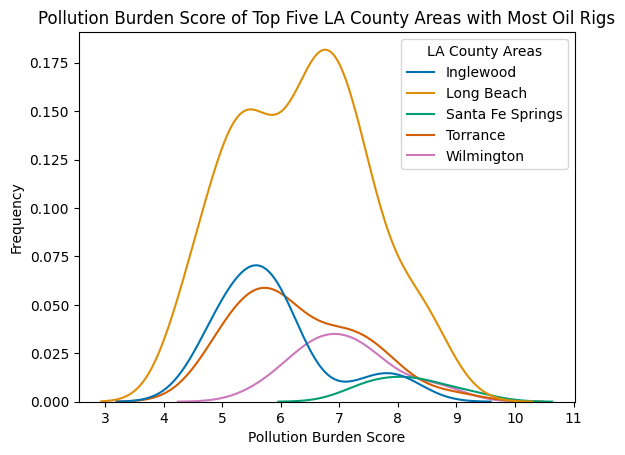

In [ ]:
sns.set_palette('colorblind')
ax = sns.kdeplot(data = highest_oil_cities_df, x = 'Pollution Burden Score', hue = 'LA County Areas')
ax.set_ylabel("Frequency")
ax.set_title("Pollution Burden Score of Top Five LA County Areas with Most Oil Rigs")


In [ ]:
# similar analysis from assignemnt can be said abt the peaks and where they are at on the x
# i did this graph instead of the histoplot because the boxes were messy, and it felt like we were only discussing the lines!

In [ ]:
#also i am trying to kee all the areas to have the same color :)

# **Graph 3: Median Household Income of Top 5 Oil Well Cities (Box Plot)**

In [ ]:
la_county_data_link = 'https://docs.google.com/spreadsheets/d/1UnA4Nx0pK5jhnBubz40OtiFRcXZC-di-8nAXWlKmaPA/export?format=csv'
la_county_datadf = pd.read_csv(la_county_data_link)

In [ ]:
la_county_datadf['csa'] = la_county_datadf['csa'].str.replace('Los Angeles - ', '', regex=False)
la_county_datadf['csa'] = la_county_datadf['csa'].str.replace('City of ', '', regex=False)

In [ ]:
cities = ["Long Beach", "Wilmington", "Torrance", "Inglewood", "Santa Fe Springs"]
df_cities = la_county_datadf[la_county_datadf["csa"].isin(cities)]

In [ ]:
null_count_colB = df_cities['med_hh_income'].isna().sum()
total_null_count = df_cities['med_hh_income'].isna().sum().sum()
df_cleaned = df_cities.dropna(subset=['med_hh_income'])
total_null_count_1 = df_cleaned['med_hh_income'].isna().sum().sum()

In [ ]:
df_cleaned = df_cleaned.sort_values(by=['csa'])

/tmp/ipython-input-1543847800.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['20,000','40,000','60,000','80,000','100,000','120,000','140,000','160,000','180,000', '200,000'])


[Text(0.0, 0, '20,000'),
 Text(20000.0, 0, '40,000'),
 Text(40000.0, 0, '60,000'),
 Text(60000.0, 0, '80,000'),
 Text(80000.0, 0, '100,000'),
 Text(100000.0, 0, '120,000'),
 Text(120000.0, 0, '140,000'),
 Text(140000.0, 0, '160,000'),
 Text(160000.0, 0, '180,000'),
 Text(180000.0, 0, '200,000'),
 Text(200000.0, 0, '')]

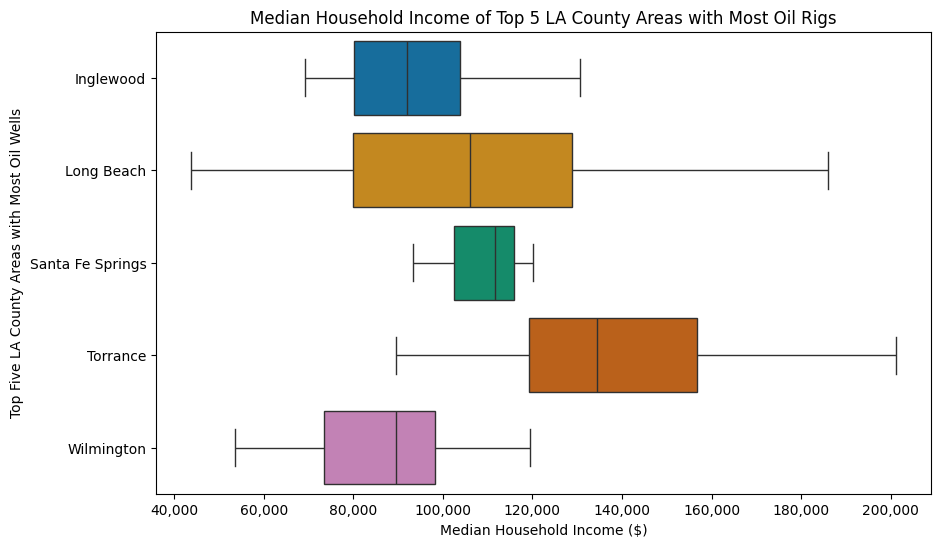

In [ ]:
ax = sns.boxplot(data = df_cleaned, x = "med_hh_income", y = "csa", hue = "csa")
ax.set(xlabel = "Median Household Income ($)", ylabel = "Top Five LA County Areas with Most Oil Wells")
ax.set_title("Median Household Income of Top 5 LA County Areas with Most Oil Rigs")
fig = ax.get_figure()
fig.set_size_inches(10, 6)

ax.set_xticklabels(['20,000','40,000','60,000','80,000','100,000','120,000','140,000','160,000','180,000', '200,000'])

# **Map 1: Pollution Burden Score and Active Oil Wells in LA County**

In [ ]:
cal_enviro_la = calenviro_df[calenviro_df['California County'] == 'Los Angeles']
# create a new df from the original dataframe by filtering out (or dropping) any rows in which the county is not "Los Angeles"
cal_enviro_cleaned = cal_enviro_la[['Census Tract','Longitude','Latitude','Total Population','ZIP','Approximate Location','Pollution Burden Score','Lead Pctl']]
# cleaning the data and creating a new cleaned dataframe with only the desired / selected columns listed above from the orignal dataframe
geometry1 = gpd.points_from_xy(x= cal_enviro_cleaned ['Longitude'], y = cal_enviro_cleaned ['Latitude'])
# creating geometry using geopandas (mention importing if first time using, and state why) and deriving it from the longitude and latitude variables from the cleaned dataframe

cal_enviro_gdf = gpd.GeoDataFrame(cal_enviro_cleaned, geometry = geometry1, crs= 'EPSG:4326') # Set initial CRS to WGS84
# create a new geodataframe from the old Pandas dataframe using geopandas, setting the geometry to the newly created geometry variable and setting the crs to 'EPSG:4326' (what does that crs represent?)
# ^ EPSG:4326 is the code for the WGS84 geographic coordinate reference system, which uses latitude and longitude in decimal degrees to represent locations on Earth. It is based on the WGS84 datum and is the standard system for GPS, making it the most common coordinate system for global location data
cal_enviro_gdf = cal_enviro_gdf.to_crs('EPSG:2229') # Reproject to match gdf_la_map (la census dataframe)

cal_enviro_gdf['Census Tract'] = cal_enviro_gdf['Census Tract'].astype(str)
# ensure that values of the census tract column of the geodataframe are strings

In [ ]:
active_oil = geohub_df[geohub_df['WellStatus']=='A']
# create a new dataframe from the geohub pandas dataframe where you drop all the rows that don't have a well status of 'A' which means active
active_oil_valid = active_oil[active_oil['Latitude']!= 0]
# further filter the active_oil dataframe to drop any rows where the latitude is equal to 0 (can look up justification if needed)
active_oil_cleaned =active_oil_valid[['FieldName','AreaName','WellStatus','APINumber','Latitude','Longitude']]
# clean up the dataframe to only include desired columns (or variables) ^
geometry = gpd.points_from_xy( x= active_oil_cleaned['Longitude'], y = active_oil_cleaned['Latitude'])
# create geomtry variable using the latitude and longitude from the active oil dataframe
geo_hub_gdf = gpd.GeoDataFrame(active_oil_cleaned, geometry = geometry, crs= 'EPSG:4326') # Set initial CRS to WGS84
# create a new geodataframe from the existing active oil pandas dataframe using geopandas; set geometry to geometry variable and set crs to 'EPSG:4326'
geo_hub_gdf = geo_hub_gdf.to_crs('EPSG:2229') # Reproject to match gdf_la_map

In [ ]:
gdf_map = gpd.read_file("https://raw.githubusercontent.com/gboeing/ppd534/main/data/tl_2017_06_tract/tl_2017_06_tract.shp") #importing a base map

In [ ]:
gdf_la_map= gdf_map[gdf_map['COUNTYFP']=='037'] # filtering for only LA county, using unique county code
gdf_la_map = gdf_la_map.to_crs('EPSG:2229') # projecting the crs of the la map geodataframe to 'EPSG:2229'
gdf_la_map['GEOID'] = gdf_la_map['GEOID'].str.lstrip('0') # clean up the geoid column of the la map geodataframe by stripping any leading zeroes so that you can merge with the cal_enviro_gdf

In [ ]:
merged_enviro_la = cal_enviro_gdf.merge(gdf_la_map, how = 'left', left_on = 'Census Tract', right_on = 'GEOID')

# merge the two geodataframes (cal_enviro_gdf and gdf_la_map) using a left join (census tract from cal_enviro and geoid from la_map)

In [ ]:
merged_enviro_la.shape

(2343, 22)

In [ ]:
merged_enviro_la

,Census Tract,Longitude,Latitude,Total Population,ZIP,Approximate Location,Pollution Burden Score,Lead Pctl,geometry_x,STATEFP,...,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry_y
0,6037204920,-118.197497,34.017500,2751,90023,Los Angeles,9.483880,98.399496,POINT (6501817.465 1828809.689),06,...,6037204920,2049.20,Census Tract 2049.20,G5020,S,909972.0,0.0,+34.0175004,-118.1974975,"POLYGON ((6500200.981 1829597.74, 6500203.463 ..."
1,6037542402,-118.212413,33.881969,3306,90221,Compton,9.332895,97.492124,POINT (6497193.161 1779496.166),06,...,6037542402,5424.02,Census Tract 5424.02,G5020,S,1567564.0,0.0,+33.8819690,-118.2124134,"POLYGON ((6495251.394 1781908.785, 6495296.616..."
2,6037543202,-118.230032,33.879862,5124,90220,Compton,8.946708,97.706364,POINT (6491843.669 1778741.04),06,...,6037543202,5432.02,Census Tract 5432.02,G5020,S,3036585.0,53916.0,+33.8797798,-118.2296785,"POLYGON ((6486189.911 1778956.59, 6486321.654 ..."
3,6037203300,-118.207788,34.058872,2000,90033,Los Angeles,9.091802,84.310019,POINT (6498730.092 1843871.996),06,...,6037203300,2033,Census Tract 2033,G5020,S,1489011.0,2852.0,+34.0588723,-118.2077883,"POLYGON ((6496600.758 1844384.395, 6496730.965..."
4,6037291220,-118.286709,33.877139,3640,90247,Los Angeles,10.000000,74.215501,POINT (6474637.374 1777794.59),06,...,6037291220,2912.20,Census Tract 2912.20,G5020,S,818695.0,0.0,+33.8771395,-118.2867090,"POLYGON ((6473253.655 1779418.947, 6473583.623..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,6037980026,-118.263309,34.273483,26,91042,Los Angeles,4.024555,NaN,POINT (6482118.043 1922011.887),06,...,6037980026,9800.26,Census Tract 9800.26,G5020,S,13858036.0,35273.0,+34.2734829,-118.2633094,"POLYGON ((6455413.446 1924589.751, 6455414.905..."
2339,6037980028,-118.417488,33.942108,0,90045,Los Angeles,8.250705,NaN,POINT (6435038.36 1801576.981),06,...,6037980028,9800.28,Census Tract 9800.28,G5020,S,17299747.0,2367417.0,+33.9421429,-118.4173296,"POLYGON ((6424433.082 1802002.448, 6426265.302..."
2340,6037980030,-118.409478,33.909624,0,90245,El Segundo,8.225283,NaN,POINT (6437419.641 1789745.242),06,...,6037980030,9800.30,Census Tract 9800.30,G5020,S,4248789.0,990973.0,+33.9096235,-118.4094782,"POLYGON ((6429042.814 1792244.117, 6431230.021..."
2341,6037980031,-118.262727,33.733835,1175,90731,Los Angeles,8.487209,NaN,POINT (6481780.646 1725622.424),06,...,6037980031,9800.31,Census Tract 9800.31,G5020,S,12492183.0,13434637.0,+33.7390903,-118.2585391,"POLYGON ((6473190.301 1732904.373, 6473357.494..."


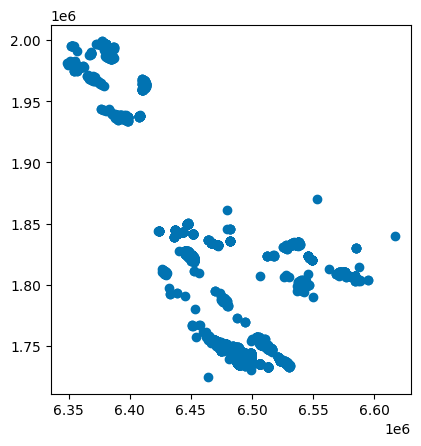

In [ ]:
geo_hub_gdf.geom_type.value_counts()
geo_hub_gdf.plot()
# plot points from geo_hub geodataframe to view the locations of the active oil wells
plt.show()

In [ ]:
merged_enviro_la_gdf = gpd.GeoDataFrame(merged_enviro_la, geometry = merged_enviro_la['geometry_y'])
# created a new geodataframe from the merged geodataframes and declared the active geometry as the geometry from the la_map geodataframe

display(merged_enviro_la_gdf)
merged_enviro_la_gdf = merged_enviro_la_gdf.to_crs(geo_hub_gdf.crs)
# reproject the crs of the new geodataframe to match the crs of the geo_hub geodataframe before plotting

,Census Tract,Longitude,Latitude,Total Population,ZIP,Approximate Location,Pollution Burden Score,Lead Pctl,geometry_x,STATEFP,...,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry_y,geometry
0,6037204920,-118.197497,34.017500,2751,90023,Los Angeles,9.483880,98.399496,POINT (6501817.465 1828809.689),06,...,2049.20,Census Tract 2049.20,G5020,S,909972.0,0.0,+34.0175004,-118.1974975,"POLYGON ((6500200.981 1829597.74, 6500203.463 ...","POLYGON ((6500200.981 1829597.74, 6500203.463 ..."
1,6037542402,-118.212413,33.881969,3306,90221,Compton,9.332895,97.492124,POINT (6497193.161 1779496.166),06,...,5424.02,Census Tract 5424.02,G5020,S,1567564.0,0.0,+33.8819690,-118.2124134,"POLYGON ((6495251.394 1781908.785, 6495296.616...","POLYGON ((6495251.394 1781908.785, 6495296.616..."
2,6037543202,-118.230032,33.879862,5124,90220,Compton,8.946708,97.706364,POINT (6491843.669 1778741.04),06,...,5432.02,Census Tract 5432.02,G5020,S,3036585.0,53916.0,+33.8797798,-118.2296785,"POLYGON ((6486189.911 1778956.59, 6486321.654 ...","POLYGON ((6486189.911 1778956.59, 6486321.654 ..."
3,6037203300,-118.207788,34.058872,2000,90033,Los Angeles,9.091802,84.310019,POINT (6498730.092 1843871.996),06,...,2033,Census Tract 2033,G5020,S,1489011.0,2852.0,+34.0588723,-118.2077883,"POLYGON ((6496600.758 1844384.395, 6496730.965...","POLYGON ((6496600.758 1844384.395, 6496730.965..."
4,6037291220,-118.286709,33.877139,3640,90247,Los Angeles,10.000000,74.215501,POINT (6474637.374 1777794.59),06,...,2912.20,Census Tract 2912.20,G5020,S,818695.0,0.0,+33.8771395,-118.2867090,"POLYGON ((6473253.655 1779418.947, 6473583.623...","POLYGON ((6473253.655 1779418.947, 6473583.623..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,6037980026,-118.263309,34.273483,26,91042,Los Angeles,4.024555,NaN,POINT (6482118.043 1922011.887),06,...,9800.26,Census Tract 9800.26,G5020,S,13858036.0,35273.0,+34.2734829,-118.2633094,"POLYGON ((6455413.446 1924589.751, 6455414.905...","POLYGON ((6455413.446 1924589.751, 6455414.905..."
2339,6037980028,-118.417488,33.942108,0,90045,Los Angeles,8.250705,NaN,POINT (6435038.36 1801576.981),06,...,9800.28,Census Tract 9800.28,G5020,S,17299747.0,2367417.0,+33.9421429,-118.4173296,"POLYGON ((6424433.082 1802002.448, 6426265.302...","POLYGON ((6424433.082 1802002.448, 6426265.302..."
2340,6037980030,-118.409478,33.909624,0,90245,El Segundo,8.225283,NaN,POINT (6437419.641 1789745.242),06,...,9800.30,Census Tract 9800.30,G5020,S,4248789.0,990973.0,+33.9096235,-118.4094782,"POLYGON ((6429042.814 1792244.117, 6431230.021...","POLYGON ((6429042.814 1792244.117, 6431230.021..."
2341,6037980031,-118.262727,33.733835,1175,90731,Los Angeles,8.487209,NaN,POINT (6481780.646 1725622.424),06,...,9800.31,Census Tract 9800.31,G5020,S,12492183.0,13434637.0,+33.7390903,-118.2585391,"POLYGON ((6473190.301 1732904.373, 6473357.494...","POLYGON ((6473190.301 1732904.373, 6473357.494..."


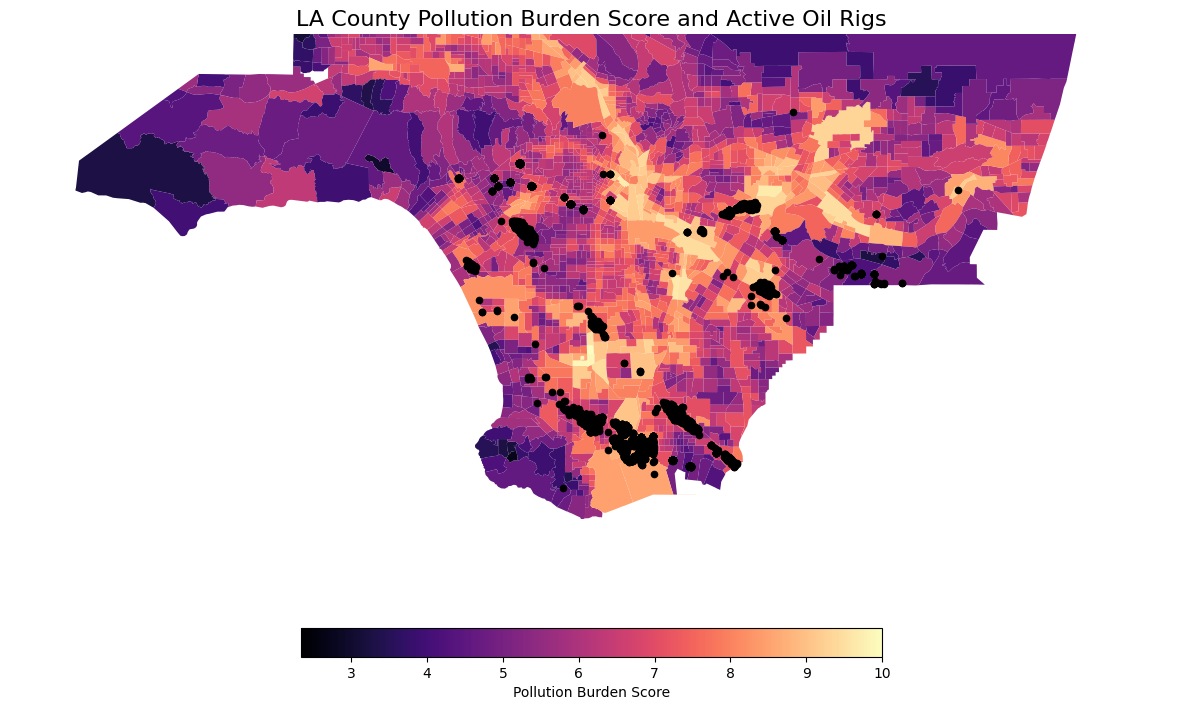

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 20))
# creating a figure and setting the figsize

merged_enviro_la_gdf.plot(
    column='Pollution Burden Score',
    cmap='magma',
    linewidth=0.8,
    ax=ax,
    # edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Pollution Burden Score", 'orientation': "horizontal", 'pad': 0.05, 'shrink': 0.5}
)
# plot the merged enviro geodataframe using the 'Pollution Burden Score' column and use the 'magma' color map to create a color gradient based on the level of pollution burden
geo_hub_gdf.plot(
    ax=ax,
    markersize=20,
    marker = 'o',
    color='black',

)
# plot (overlay) the active oil wells as black circles on the same plot
ax.set_title('LA County Pollution Burden Score and Active Oil Rigs', fontsize=16)
# feel free to add `ax.axis("off")` if you want labeled axes
ax.axis("off")
ax.set_ylim(1.7e6, 1.9e6)
ax.set_xlim(6.25e6, 6.70e6)
plt.show()

# **Map 2: Median Household Income and Active Oil Wells in LA County**

In [ ]:
merged_enviro_la_gdf.columns

Index(['Census Tract', 'Longitude', 'Latitude', 'Total Population', 'ZIP',
       'Approximate Location', 'Pollution Burden Score', 'Lead Pctl',
       'geometry_x', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'geometry_y', 'geometry'],
      dtype='object')

In [ ]:
#merge similar but this time do the ?

In [ ]:
la_county_datadf['tract'] = la_county_datadf['tract'].astype(str)
# ensure that values of the tract column for the la_county_datadf are strings

In [ ]:
la_county_hh_income = la_county_datadf[['tract','med_hh_income']]
# create a new dataframe from the old dataframe (la_county_datadf) where you only select the 'tract' and 'med_hh_income' columns

In [ ]:
merged_census_la = la_county_hh_income.merge(gdf_la_map, how='left', left_on='tract', right_on='GEOID')
# create a merged dataframe by performing a left join between the la_county_hh_income dataframe (new dataframe with just the selected columns) and gdf_la_map (la census geodataframe)

In [ ]:
merged_census_la_geo = gpd.GeoDataFrame(merged_census_la, geometry='geometry', crs=gdf_la_map.crs)
# turn that merged dataframe into a Geodataframe using geopandas and assigning its geomtry to the geometry variable from the original merged dataframe and the crs to the crs from the gdf_la_map (la census dataframe)

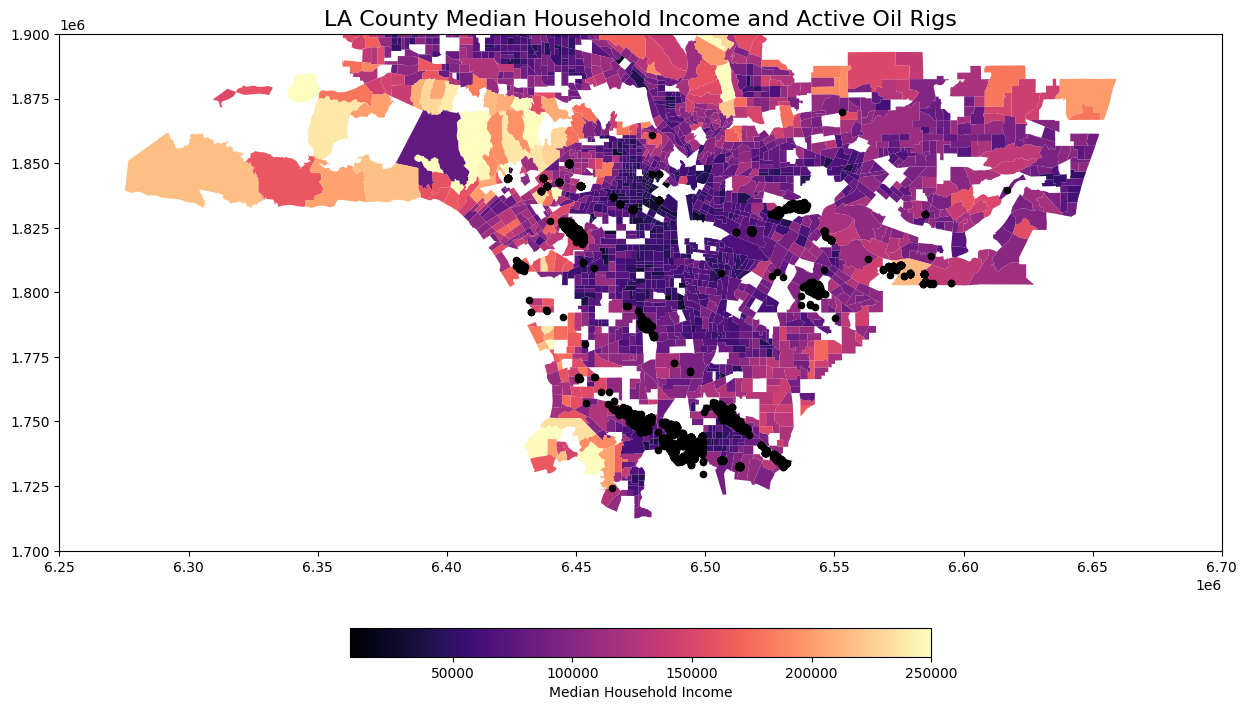

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 20))
# creating a plot using matplotlib
merged_census_la_geo.plot(
    column='med_hh_income',
    cmap='magma',
    linewidth=0.8,
    ax=ax,
    legend=True,
    legend_kwds={'label': "Median Household Income", 'orientation': "horizontal", 'pad': 0.05, 'shrink': 0.5}
)
# plot the merged geodataframe using the 'med_hh_income' column and defining a 'magma' colormap to map the color gradient of the LA county census tracts based on the amount of median household income
geo_hub_gdf.plot(
    ax=ax,
    markersize=20,
    marker = 'o',
    color='black',

)
# plot (overlay) the active oil wells as black circles on the same plot
ax.set_title('LA County Median Household Income and Active Oil Rigs', fontsize=16)

ax.set_ylim(1.7e6, 1.9e6)
ax.set_xlim(6.25e6, 6.70e6)
plt.show()

In [ ]:
# please note that these holes are in areas where household median income is not tracted by the census
# this could be because of geographical monuments (mountains, water)
# industrial entites: airports

# **Map 3: Lead Pctl and Active Oil Wells in LA County**

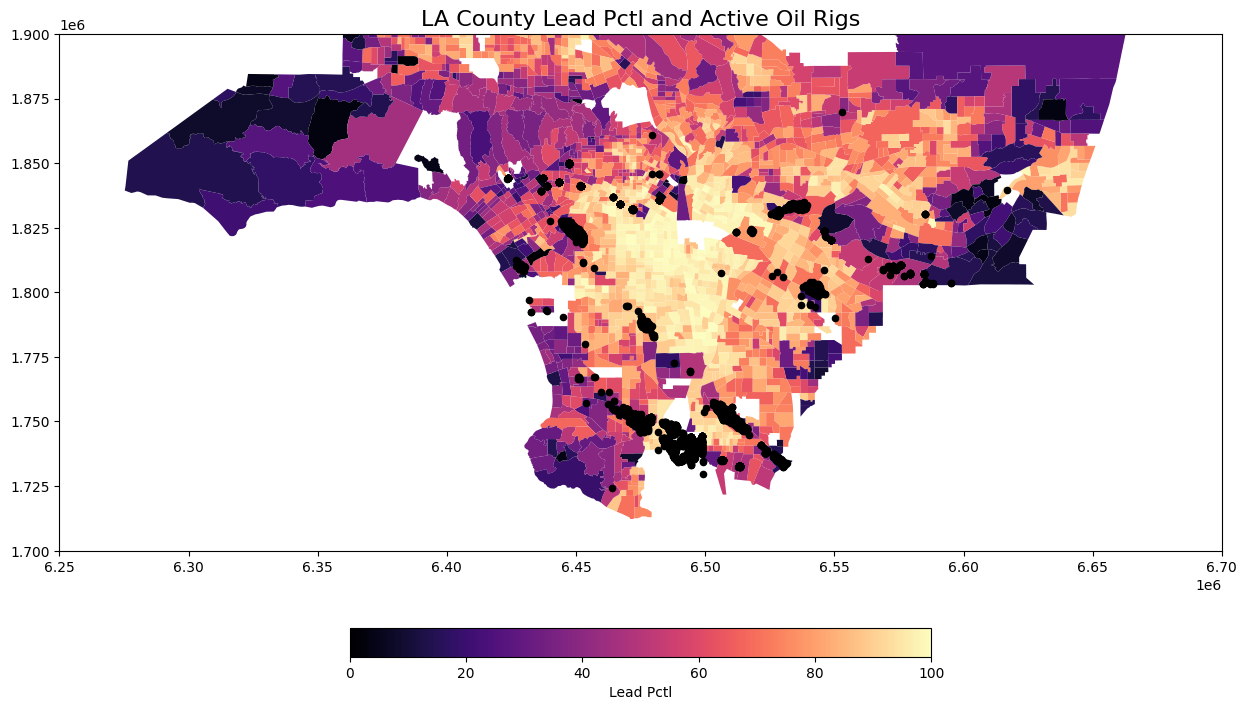

In [ ]:
# same exact geodataframes as the ones used in the Map 1 plot

fig, ax = plt.subplots(1, 1, figsize=(15, 20))
# create a plot using matplotlib
merged_enviro_la_gdf.plot(
    column='Lead Pctl',
    cmap='magma',
    linewidth=0.8,
    ax=ax,
    # edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Lead Pctl", 'orientation': "horizontal", 'pad': 0.05, 'shrink': 0.5}
)
# plot the merged enviro geodataframe using the 'Lead Pctl' (what is it?) column and use the 'magma' color map to create a color gradient based on the level of Lead Pctl
geo_hub_gdf.plot(
    ax=ax,
    markersize=20,
    marker = 'o',
    color='black',

)
# plot (overlay) the active oil wells as black circles on the same plot
ax.set_title('LA County Lead Pctl and Active Oil Rigs', fontsize=16)

ax.set_ylim(1.7e6, 1.9e6)
ax.set_xlim(6.25e6, 6.70e6)
# define borders
plt.show()

In [ ]:
# STATS

In [ ]:
import scipy as stats
import statsmodels.api as sm

# import statements for the necessary libraries for regression

In [ ]:
merged_enviro_la_gdf.head(3)

,Census Tract,Longitude,Latitude,Total Population,ZIP,Approximate Location,Pollution Burden Score,Lead Pctl,geometry_x,STATEFP,...,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry_y,geometry
0,6037204920,-118.197497,34.017500,2751,90023,Los Angeles,9.483880,98.399496,POINT (6501817.465 1828809.689),06,...,2049.20,Census Tract 2049.20,G5020,S,909972.0,0.0,+34.0175004,-118.1974975,"POLYGON ((6500200.981 1829597.74, 6500203.463 ...","POLYGON ((6500200.981 1829597.74, 6500203.463 ..."
1,6037542402,-118.212413,33.881969,3306,90221,Compton,9.332895,97.492124,POINT (6497193.161 1779496.166),06,...,5424.02,Census Tract 5424.02,G5020,S,1567564.0,0.0,+33.8819690,-118.2124134,"POLYGON ((6495251.394 1781908.785, 6495296.616...","POLYGON ((6495251.394 1781908.785, 6495296.616..."
2,6037543202,-118.230032,33.879862,5124,90220,Compton,8.946708,97.706364,POINT (6491843.669 1778741.04),06,...,5432.02,Census Tract 5432.02,G5020,S,3036585.0,53916.0,+33.8797798,-118.2296785,"POLYGON ((6486189.911 1778956.59, 6486321.654 ...","POLYGON ((6486189.911 1778956.59, 6486321.654 ..."


In [ ]:
geo_hub_gdf.head(3)

,FieldName,AreaName,WellStatus,APINumber,Latitude,Longitude,geometry
32,Inglewood,Any Area,A,3700200,33.998249,-118.365867,POINT (6450769.82 1821946.741)
33,Inglewood,Any Area,A,3700254,34.010837,-118.383609,POINT (6445409.604 1826547.787)
35,Las Cienegas,Jefferson,A,3700302,34.026304,-118.296502,POINT (6471824.885 1832087.206)


Conduct a statistical analysis. This shall include, at a minimum, a set of descriptive statistics, some exploratory analysis, and a model, such as a multiple regression model.


In [ ]:
from geopy import distance #new library to find distance between lat and long

In [ ]:
testing_point1 = (33.998249,-118.365867)
testing_point2 = (32.879862,-118.230032)

dist_geodesic = distance.geodesic(testing_point1, testing_point2).miles
print(dist_geodesic)

77.47521330879876


In [ ]:
la_county_hh_income

,tract,med_hh_income
0,6037101110,84091.0
1,6037101122,99583.0
2,6037101220,69676.0
3,6037101221,53798.0
4,6037101222,45662.0
...,...,...
2490,6037980035,65750.0
2491,6037980036,172829.0
2492,6037980037,NaN
2493,6037980038,NaN


In [ ]:
# reprojecting both gdf to get crs that is in meters
cal_enviro_m = merged_enviro_la_gdf.to_crs(3857)
oil_m = geo_hub_gdf.to_crs(3857)

In [ ]:
nearest = cal_enviro_m.sjoin_nearest(oil_m, how = 'left', distance_col = 'dist_m') #joining the dataframes (using a left spatial join); declaring a distance column to keep track of the distance between the cal_enviro_m and oil_m geodataframes

In [ ]:
nearest = nearest.merge(la_county_hh_income, how = 'left',left_on = 'GEOID', right_on = "tract" ) # merge with household income dataframe using a left join

In [ ]:
nearest.reset_index(drop = True)
# reset index and dropping the old index entirely
merged_enviro_la_gdf = merged_enviro_la_gdf.reset_index(drop = True)
# reset index and dropping the old index entirely

In [ ]:
nearest

,Census Tract,Longitude_left,Latitude_left,Total Population,ZIP,Approximate Location,Pollution Burden Score,Lead Pctl,geometry_x,STATEFP,...,index_right,FieldName,AreaName,WellStatus,APINumber,Latitude_right,Longitude_right,dist_m,tract,med_hh_income
0,6037204920,-118.197497,34.017500,2751,90023,Los Angeles,9.483880,98.399496,POINT (6501817.465 1828809.689),06,...,15853.0,Bandini,Any Area,A,3700805.0,34.002313,-118.163643,3400.599172,6037204920,70500.0
1,6037542402,-118.212413,33.881969,3306,90221,Compton,9.332895,97.492124,POINT (6497193.161 1779496.166),06,...,16013.0,Dominguez,Any Area,A,3721975.0,33.854253,-118.222796,2654.028833,6037542402,87750.0
2,6037543202,-118.230032,33.879862,5124,90220,Compton,8.946708,97.706364,POINT (6491843.669 1778741.04),06,...,10363.0,Dominguez,Any Area,A,3727148.0,33.863534,-118.243132,1323.827866,NaN,NaN
3,6037203300,-118.207788,34.058872,2000,90033,Los Angeles,9.091802,84.310019,POINT (6498730.092 1843871.996),06,...,6387.0,Los Angeles City,Any Area,A,3719008.0,34.064083,-118.262532,5333.224972,6037203300,42066.0
4,6037291220,-118.286709,33.877139,3640,90247,Los Angeles,10.000000,74.215501,POINT (6474637.374 1777794.59),06,...,6801.0,"Rosecrans, South",Any Area,A,3714590.0,33.891127,-118.269229,1938.929723,6037291220,75324.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6072,6037980033,-118.220310,33.744315,16,90802,Long Beach,8.535886,NaN,POINT (6494686.493 1729405.633),06,...,16896.0,Wilmington,Fault Block IV,A,3703545.0,33.779764,-118.218169,0.000000,6037980033,NaN
6073,6037980033,-118.220310,33.744315,16,90802,Long Beach,8.535886,NaN,POINT (6494686.493 1729405.633),06,...,15322.0,Wilmington,Fault Block IV,A,3703520.0,33.779817,-118.215993,0.000000,6037980033,NaN
6074,6037980033,-118.220310,33.744315,16,90802,Long Beach,8.535886,NaN,POINT (6494686.493 1729405.633),06,...,21584.0,Wilmington,Fault Block VI,A,3703858.0,33.780794,-118.206604,0.000000,6037980033,NaN
6075,6037980033,-118.220310,33.744315,16,90802,Long Beach,8.535886,NaN,POINT (6494686.493 1729405.633),06,...,20691.0,Wilmington,Fault Block V,A,3703901.0,33.780803,-118.206623,0.000000,6037980033,NaN


In [ ]:
nearest.columns

Index(['Census Tract', 'Longitude_left', 'Latitude_left', 'Total Population',
       'ZIP', 'Approximate Location', 'Pollution Burden Score', 'Lead Pctl',
       'geometry_x', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'geometry_y', 'geometry', 'index_right', 'FieldName',
       'AreaName', 'WellStatus', 'APINumber', 'Latitude_right',
       'Longitude_right', 'dist_m', 'tract', 'med_hh_income'],
      dtype='object')

In [ ]:
nearest['Pollution Burden Score'].describe() # generate descriptive statistics of pollution burden score of LA stats

,Pollution Burden Score
count,6077.000000
mean,6.779827
std,1.342460
min,2.330161
25%,5.758317
50%,6.821071
75%,7.775384
max,10.000000


In [ ]:
nearest['Lead Pctl'].describe() # generate descriptive statistics of Lead Pctl of LA stats

,Lead Pctl
count,5424.000000
mean,56.747063
std,27.124406
min,0.000000
25%,32.854442
50%,59.861374
75%,80.330813
max,100.000000


In [ ]:
nearest['med_hh_income'].dropna().describe() # generate descriptive statistics of med_hh_income of LA stats (drop null values as well)

,med_hh_income
count,4085.000000
mean,98200.247736
std,38698.394657
min,18366.000000
25%,72434.000000
50%,95130.000000
75%,124565.000000
max,250001.000000


In [ ]:
nearest['Median HH Income'] = nearest['med_hh_income'] # creating a new column called 'Median HH Income' and mapping all of the values from the old column 'med_hh_income'

In [ ]:
nearest['Distance to Nearest Oil Rig'] = nearest['dist_m']

In [ ]:
# multivariable regression because we have multiple predictors

response = 'Distance to Nearest Oil Rig' # we are predicting the distance between cal_enviro_m and oil_m geodataframes
predictors = ['Pollution Burden Score','Lead Pctl','Median HH Income'] # predictor variables

data = nearest[[response]+predictors].dropna() # store our data in a new dataframe by filtering for just the response and predictor columns in the nearest dataframe and dropping all the null values

X = data[predictors] # your x is the predictors
Y = data[response] # your y is the response

model = sm.OLS(Y, sm.add_constant(X)) # create model using statsmodels.api
result = model.fit() # fit the model to store the results
print(result.summary()) # print the results summary


# very weak linear relationship as observed by the r-squared of 0.112 <-- log normalization might help this (either of just the response or response and predictors)
# t (high values indicate lower probability of observations / relationship being random chance) and p (below 0.05 significance level) values demonstrate statistical signifcance
# one unit increase of pollution burden score (so the score going up by 1) correlates to a 2067.85 meter decrease in distance
# one unit increase of lead pctl (so the percentile going up by 1) correlates to a 54.15 meter increase in distance
# one unit increase of median household income correlates to a 0.04 meter decrease in distance

                                 OLS Regression Results                                
Dep. Variable:     Distance to Nearest Oil Rig   R-squared:                       0.089
Model:                                     OLS   Adj. R-squared:                  0.089
Method:                          Least Squares   F-statistic:                     133.3
Date:                         Wed, 24 Dec 2025   Prob (F-statistic):           2.18e-82
Time:                                 04:50:25   Log-Likelihood:                -41708.
No. Observations:                         4080   AIC:                         8.342e+04
Df Residuals:                             4076   BIC:                         8.345e+04
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [ ]:
# multivariable regression because we have multiple predictors
response = 'Lead Pctl' # we are predicting the distance between cal_enviro_m and oil_m geodataframes
predictors = ['Distance to Nearest Oil Rig', 'Median HH Income', 'Pollution Burden Score'] # predictor variables

data = nearest[[response]+predictors].dropna() # store our data in a new dataframe by filtering for just the response and predictor columns in the nearest dataframe and dropping all the null values

X = data[predictors] # your x is the predictors
Y = data[response] # your y is the response

model = sm.OLS(Y, sm.add_constant(X)) # create model using statsmodels.api
result = model.fit() # fit the model to store the results
print(result.summary()) # print the results summary


# very weak linear relationship as observed by the r-squared of 0.112 <-- log normalization might help this (either of just the response or response and predictors)
# t (high values indicate lower probability of observations / relationship being random chance) and p (below 0.05 significance level) values demonstrate statistical signifcance
# one unit increase of pollution burden score (so the score going up by 1) correlates to a 2067.85 meter decrease in distance
# one unit increase of lead pctl (so the percentile going up by 1) correlates to a 54.15 meter increase in distance
# one unit increase of median household income correlates to a 0.04 meter decrease in distance

                            OLS Regression Results                            
Dep. Variable:              Lead Pctl   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     329.6
Date:                Wed, 24 Dec 2025   Prob (F-statistic):          5.99e-172
Time:                        04:57:29   Log-Likelihood:                -8327.1
No. Observations:                1885   AIC:                         1.666e+04
Df Residuals:                    1881   BIC:                         1.668e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
variables = ['Pollution Burden Score','Lead Pctl','Median HH Income','Distance to Nearest Oil Rig']
# create a list of the response and predictor variables from the regression analysis
correlations = nearest[variables].corr().round(2)
# create a correlation matrix rounded to the nearest 2 decimals in order to assess the impact they have on each other
correlations

,Pollution Burden Score,Lead Pctl,Median HH Income,Distance to Nearest Oil Rig
Pollution Burden Score,1.00,0.33,-0.44,-0.30
Lead Pctl,0.33,1.00,-0.53,0.05
Median HH Income,-0.44,-0.53,1.00,-0.08
Distance to Nearest Oil Rig,-0.30,0.05,-0.08,1.00


In [ ]:
#this was super simple to make, so i just included it
#i think include it, if its helpful and adds to analysis! but if not then dont include!

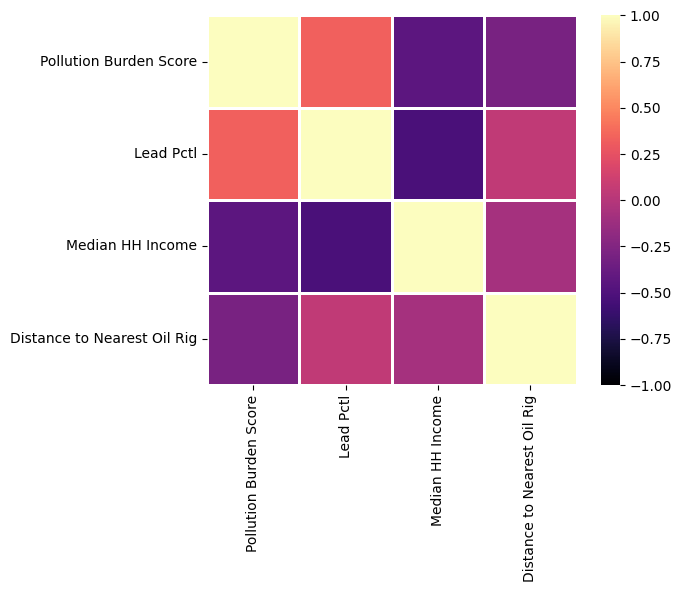

In [ ]:
ax = sns.heatmap(
    correlations, vmin=-1, vmax=1, center=0, cmap="magma", square=True, linewidths=1
)
# use seaborn to create a heatmap of your correlation matrix, defining the spectrum bounds as -1 and 1 to mirror a typical linear relationship

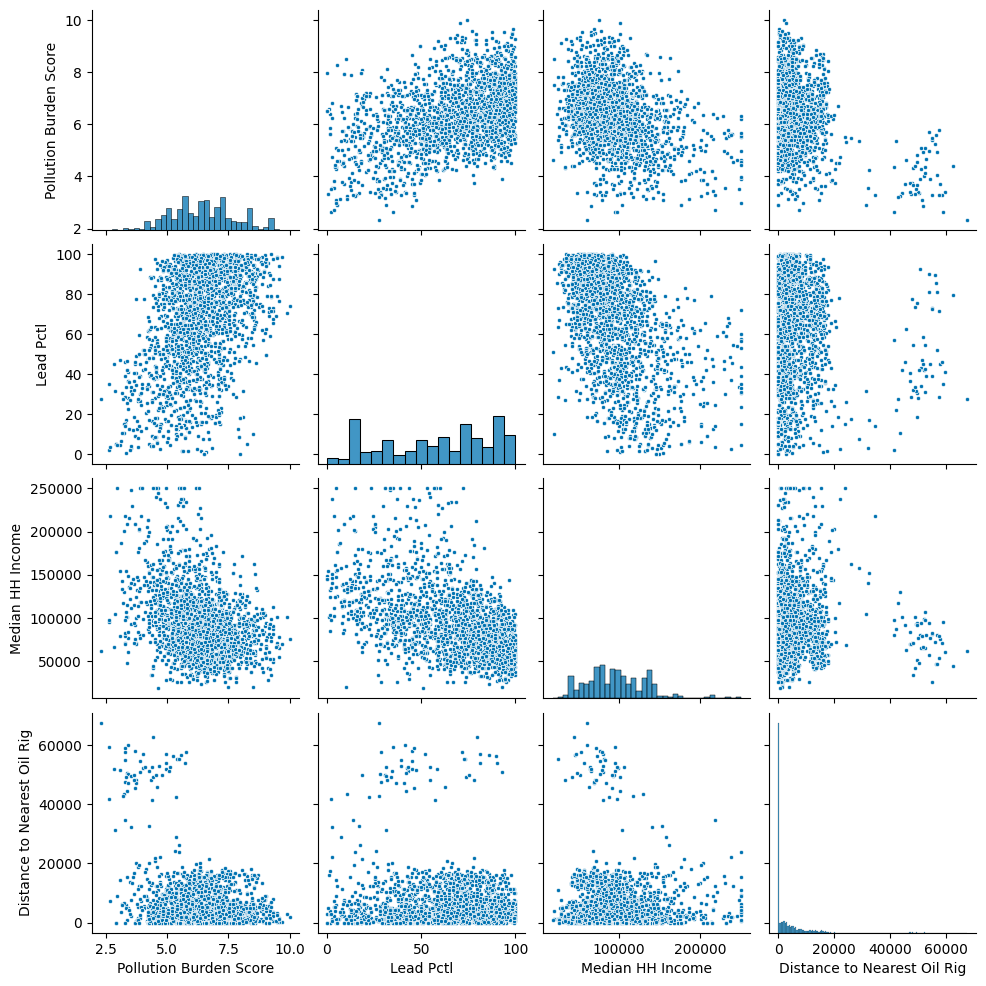

In [ ]:
grid = sns.pairplot(nearest[variables].dropna(), markers=".")
# use seaborn to create a pairplot (to visualize the linearity of the relationship between the variables) of the predictor and response variables from the nearest dataframe, dropping any null values

In [ ]:
nearest['Log of Distance to Nearest Oil Rig'] = np.log(nearest['dist_m'])
# perform log transformation on the response variable (distance to nearest oil rig)

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


the following are for the log

In [ ]:
nearest.shape

(6077, 36)

In [ ]:
nearest['Log of Distance to Nearest Oil Rig'] = nearest['Log of Distance to Nearest Oil Rig'].replace([np.inf, -np.inf], np.nan)
# clean up the log distance values by replace infinite values with null and dropping all null values in the distance column
nearest = nearest.dropna(subset = 'Log of Distance to Nearest Oil Rig') # had to do this because some values
# were inifinte (some of the logs)

In [ ]:
# rerun multivariable regression with log reponse variable (log-)
response = 'Log of Distance to Nearest Oil Rig'
# defining your response variable (log transformed version of the distance variable)
predictors = ['Pollution Burden Score','Lead Pctl','Median HH Income']
# defining your predictor variables
data = nearest[[response]+predictors].dropna()
# creating a new dataframe with only the response and predictors, dropping null values
X = data[predictors]
Y = data[response]
# x is predictors and y is response for your regression
model = sm.OLS(Y,sm.add_constant(X))
result = model.fit()
# create the regression model, fit the model, and print a results summary
print(result.summary())

# 0.03 r-squared value signifies very weak linear relationship between the response and the predictors
# log normalization changes coefficient intrepretation so now a unit increase in the predictor variables means a percentage increase or decrease in the response variable (distance)
# t and p values support statistical significance
# a unit increase in pollution burden score correlates to a 12.02% decrease in distance
# a unit increase in lead pctl correlates to a 0.53% decrease in distance
# a unit increase in median hh income correlates to a negligible (<0.01%) decrease in distance

                                    OLS Regression Results                                    
Dep. Variable:     Log of Distance to Nearest Oil Rig   R-squared:                       0.032
Model:                                            OLS   Adj. R-squared:                  0.030
Method:                                 Least Squares   F-statistic:                     20.53
Date:                                Wed, 24 Dec 2025   Prob (F-statistic):           4.36e-13
Time:                                        04:50:28   Log-Likelihood:                -2973.7
No. Observations:                                1885   AIC:                             5955.
Df Residuals:                                    1881   BIC:                             5978.
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
                             coef    std err      

In [ ]:
variables = ['Pollution Burden Score','Lead Pctl','Median HH Income','Log of Distance to Nearest Oil Rig']
# create a list of the response and predictor variables from the regression analysis
correlations = nearest[variables].corr().round(2)
# create a correlation matrix rounded to the nearest 2 decimals in order to assess the impact they have on each other
correlations

,Pollution Burden Score,Lead Pctl,Median HH Income,Log of Distance to Nearest Oil Rig
Pollution Burden Score,1.00,0.44,-0.35,-0.21
Lead Pctl,0.44,1.00,-0.50,-0.13
Median HH Income,-0.35,-0.50,1.00,0.04
Log of Distance to Nearest Oil Rig,-0.21,-0.13,0.04,1.00


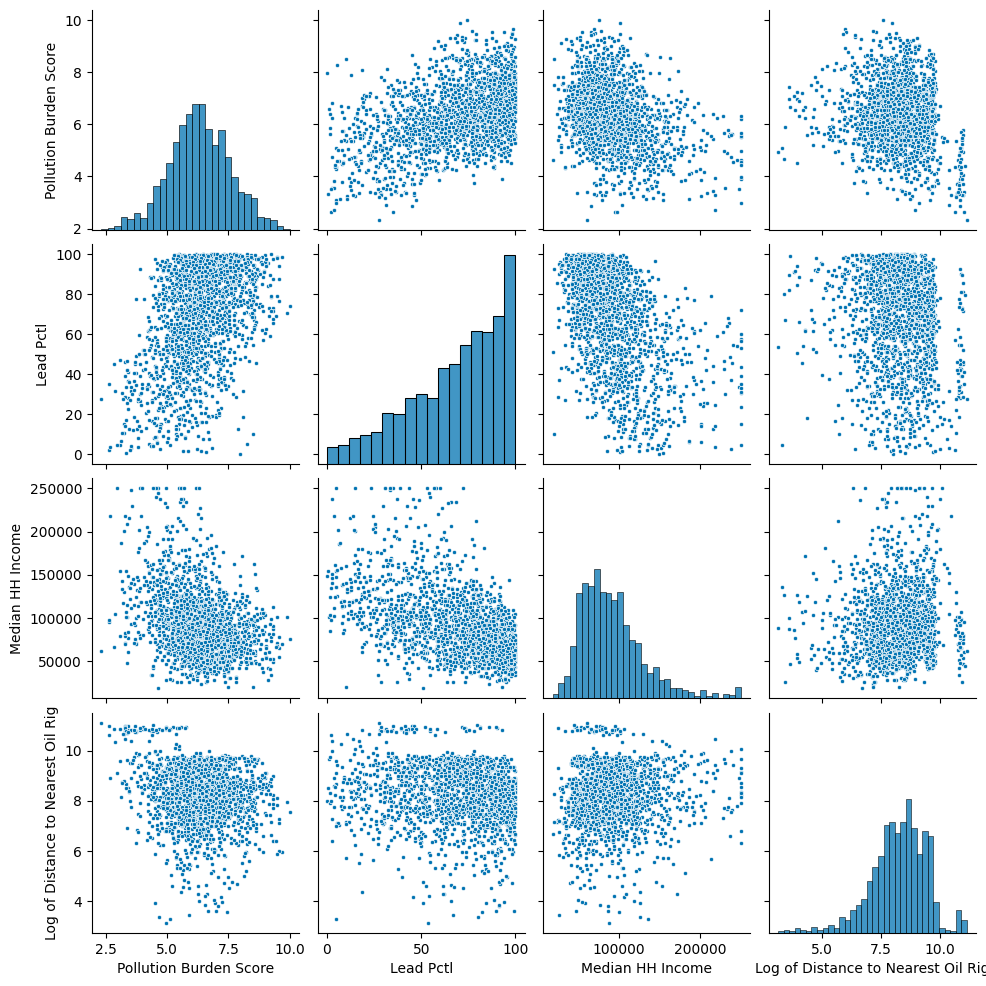

In [ ]:
grid = sns.pairplot(nearest[variables].dropna(), markers=".")
# use seaborn to create a pairplot (to visualize the linearity of the relationship between the variables) of the predictor and response variables from the nearest dataframe, dropping any null values

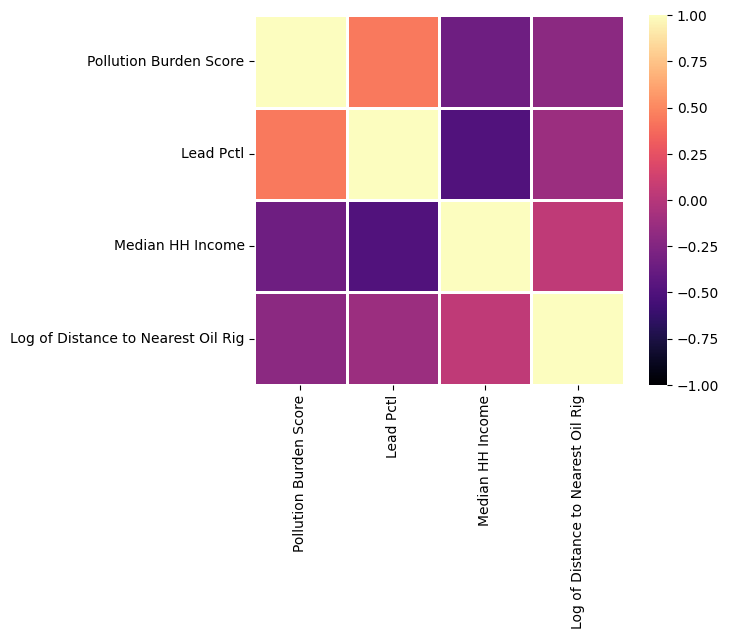

In [ ]:
ax = sns.heatmap(
    correlations, vmin=-1, vmax=1, center=0, cmap="magma", square=True, linewidths=1
)
# use seaborn to create a heatmap of your correlation matrix, defining the spectrum bounds as -1 and 1 to mirror a typical spectrum of a linear relationship